In [9]:
import os
from Ancestry.ancestry import calculate_pcs, munge_training_pca_loadings, train_umap_classifier, predict_ancestry_from_pcs, umap_transform_with_fitted, plot_3d


In [2]:
geno_path = '/data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex'
out_path = '/data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex_ancestry'

outdir = os.path.dirname(out_path)
plot_dir = f'{outdir}/plot_ancestry'
model_dir = f'{outdir}/models'
temp_dir = f'{outdir}/temp'

ref_dir_path = '/data/LNG/vitaled2/1kgenomes'
ref_panel = f'{ref_dir_path}/1kg_ashkj_ref_panel_gp2_pruned'
ref_labels = f'{ref_dir_path}/ref_panel_ancestry.txt'

# create directories if not already in existence
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)
os.makedirs(temp_dir, exist_ok=True)

In [3]:
calc_pcs = calculate_pcs(geno=geno_path, ref=ref_panel, labels=ref_labels, out=out_path, plot_dir=plot_dir, keep_temp=True)

Executing: plink --bfile /data/LNG/vitaled2/1kgenomes/1kg_ashkj_ref_panel_gp2_pruned --extract /data/vitaled2/test_data/mcgill/ref_common_snps.common_snps --make-bed --out /data/vitaled2/test_data/mcgill/ref_common_snps
Executing: flashpca --bfile /data/vitaled2/test_data/mcgill/ref_common_snps -d 50 --outpc /data/vitaled2/test_data/mcgill/ref_common_snps.pcs --outvec /data/vitaled2/test_data/mcgill/ref_common_snps.vec --outval /data/vitaled2/test_data/mcgill/ref_common_snps.val --outpve /data/vitaled2/test_data/mcgill/ref_common_snps.pve --outload /data/vitaled2/test_data/mcgill/ref_common_snps.loadings --outmeansd /data/vitaled2/test_data/mcgill/ref_common_snps.meansd


Labeled Reference Ancestry Counts:
EAS    504
AFR    504
SAS    489
AJ     471
EUR    404
AMR    347
AAC    157
FIN     99
Name: label, dtype: int64


Executing: plink --bfile /data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex --extract /data/vitaled2/test_data/mcgill/ref_common_snps.common_snps --reference-alle

In [4]:
train_split = munge_training_pca_loadings(calc_pcs['labeled_ref_pca'])

Train Accuracy: 0.9479457682023525
Best Parameters: {'svc__C': 0.001, 'umap__a': 1.5, 'umap__b': 0.25, 'umap__n_components': 15, 'umap__n_neighbors': 5}
Balanced Accuracy on Test Set: 0.9764705882352941


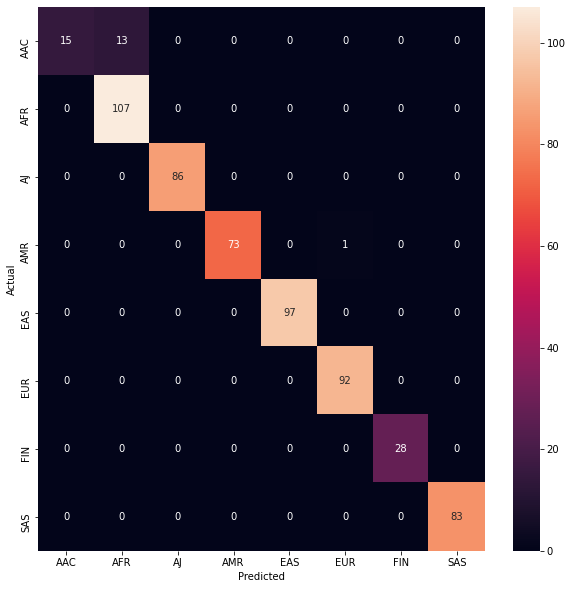

In [5]:
test_param_grid = {
        "umap__n_neighbors": [5],
        "umap__n_components": [15],
        "umap__a":[1.5],
        "umap__b": [0.25],
        "svc__C": [10**-3],
    }

plot_out = '/data/vitaled2/test_data/mcgill/plot_ancestry'
model_out = '/data/vitaled2/test_data/mcgill/models'

trained_clf = train_umap_classifier(X_train=train_split['X_train'], X_test=train_split['X_test'], y_train=train_split['y_train'], y_test=train_split['y_test'], label_encoder=train_split['label_encoder'], plot_dir=plot_dir, model_dir=model_dir, input_param_grid=test_param_grid)

In [10]:
pred = predict_ancestry_from_pcs(projected=calc_pcs['new_samples_projected'], pipe_clf=trained_clf['classifier'], label_encoder=train_split['label_encoder'], out=out_path)


predicted:
 EUR    2270
AAC      29
AJ       27
AMR      24
EAS      13
SAS       2
FIN       1
Name: label, dtype: int64



In [11]:
umap_transforms = umap_transform_with_fitted(X_new=pred['X_new'], X_ref=train_split['X_all'], y_pred=pred['y_pred'], y_ref=train_split['y_all'], label_encoder=train_split['label_encoder'], fitted_pipe_grid=trained_clf['fitted_pipe_grid'])

In [13]:
plot_3d(umap_transforms['total_umap'], color='label', symbol='dataset', plot_out=f'{plot_dir}/plot_total_umap', x=0,y=1,z=2)
plot_3d(umap_transforms['ref_umap'], color='label', symbol='dataset', plot_out=f'{plot_dir}/plot_ref_umap', x=0,y=1,z=2)
plot_3d(umap_transforms['new_samples_umap'], color='label', symbol='dataset', plot_out=f'{plot_dir}/plot_predicted_samples_umap', x=0,y=1,z=2)

In [1]:
# !python3 run_ancestry.py

.
/data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex_ancestry_common_snps /data/vitaled2/test_data/mcgill/ref_common_snps.meansd /data/vitaled2/test_data/mcgill/ref_common_snps.loadings /data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex_ancestry_common_snps.projections
Executing: flashpca --bfile /data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex_ancestry_common_snps --project --inmeansd /data/vitaled2/test_data/mcgill/ref_common_snps.meansd --inload /data/vitaled2/test_data/mcgill/ref_common_snps.loadings --outproj /data/vitaled2/test_data/mcgill/MCGILL_all_call_rate_sex_ancestry_common_snps.projections -v
Train Accuracy: 0.9479457682023525
Best Parameters: {'svc__C': 0.001, 'umap__a': 1.5, 'umap__b': 0.25, 'umap__n_components': 15, 'umap__n_neighbors': 5}
Balanced Accuracy on Test Set: 0.9764705882352941
Figure(1000x1000)

predicted:
 EUR    2270
AAC      29
AJ       27
AMR      24
EAS      13
SAS       2
FIN       1
Name: label, dtype: int64

